In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from google.colab import files
files.upload()

Saving date-hour-soo-dest-2022.csv to date-hour-soo-dest-2022.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("date-hour-soo-dest-2022.csv")

In [ ]:
df.head()

In [ ]:
df['0'].sample(10)

In [ ]:
df['1'].sample(10)

In [ ]:
df = df.rename(columns = ({
    "2022-01-01" : "Date",
    "0" : "Hour",
    "12TH" : "Origin Station",
    "12TH.1" : "Destination Station",
    "1" : "Trip Count"
}))

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [14]:
df["Date"] = pd.to_datetime(df["Date"])

df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Weekday"] = df["Date"].dt.dayofweek
df["WeekdayName"] = df["Date"].dt.day_name()
df["MonthName"] = df["Date"].dt.month_name()
df.drop(["Date"], axis = 1, inplace = True)
df.head()

,Hour,Origin Station,Destination Station,Trip Count,Year,Month,Weekday,WeekdayName,MonthName
0,0,12TH,16TH,1,2022,1,5,Saturday,January
1,0,12TH,24TH,2,2022,1,5,Saturday,January
2,0,12TH,ASHB,1,2022,1,5,Saturday,January
3,0,12TH,MONT,1,2022,1,5,Saturday,January
4,0,12TH,POWL,2,2022,1,5,Saturday,January


Text(0.5, 1.0, 'Hangi istasyon en yoğun')

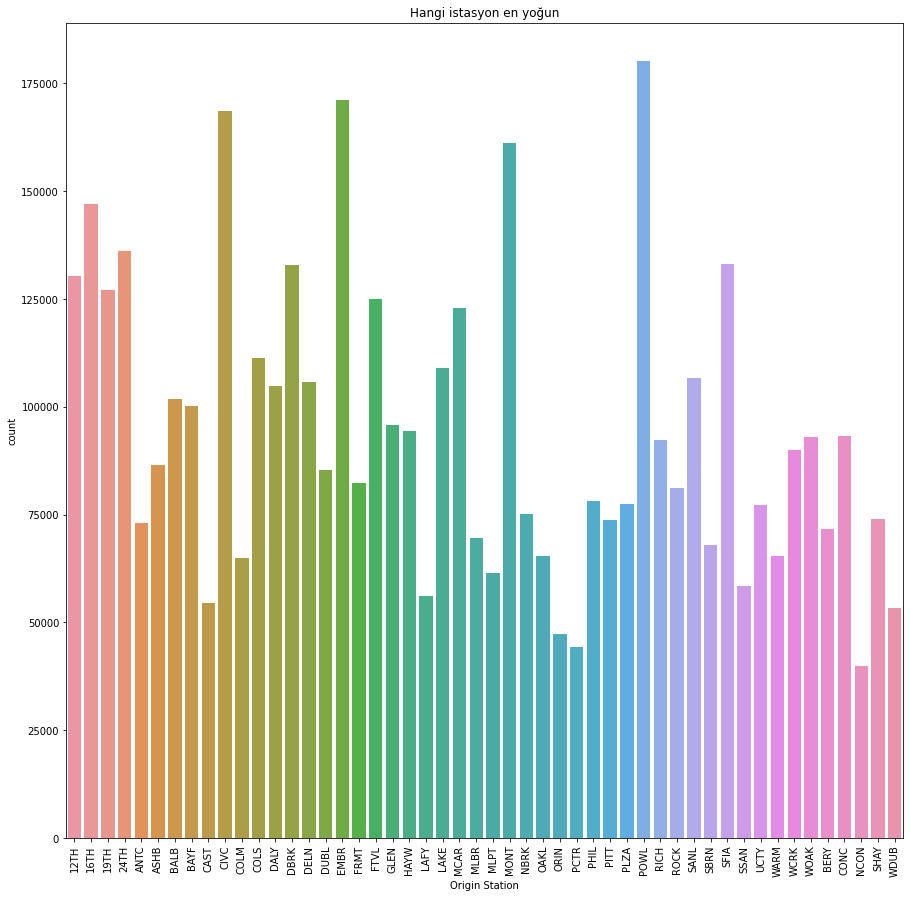

In [15]:
#Hangi istasyon en yoğun
plt.figure(figsize = (15,15))
plt.xticks(rotation = 90)
ax = sns.countplot(df['Origin Station'])
ax.set_title('Hangi istasyon en yoğun')

Text(0.5, 1.0, 'Hangi saatlerde daha yoğun')

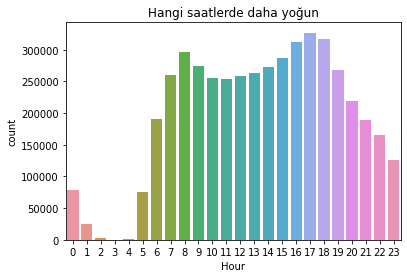

In [16]:
#Hangi saatlerde daha yoğun
bx = sns.countplot(df['Hour'])
bx.set_title('Hangi saatlerde daha yoğun')

Text(0.5, 1.0, 'Hangi ay daha yoğun')

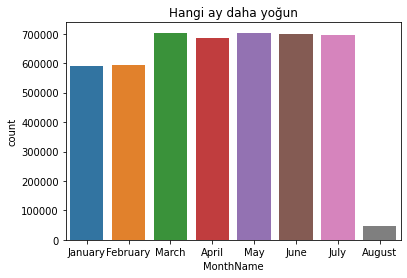

In [17]:
#Hangi ay daha yoğun
cx = sns.countplot(df['MonthName'])
cx.set_title('Hangi ay daha yoğun')

Text(0.5, 1.0, 'Haftanın hangi günü daha yoğun')

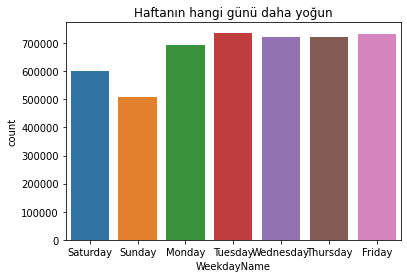

In [18]:
#Haftanın hangi günü daha yoğun
dx = sns.countplot(df['WeekdayName'])
dx.set_title('Haftanın hangi günü daha yoğun')

Text(0.5, 1.0, 'Hangi Rota daha yoğun?')

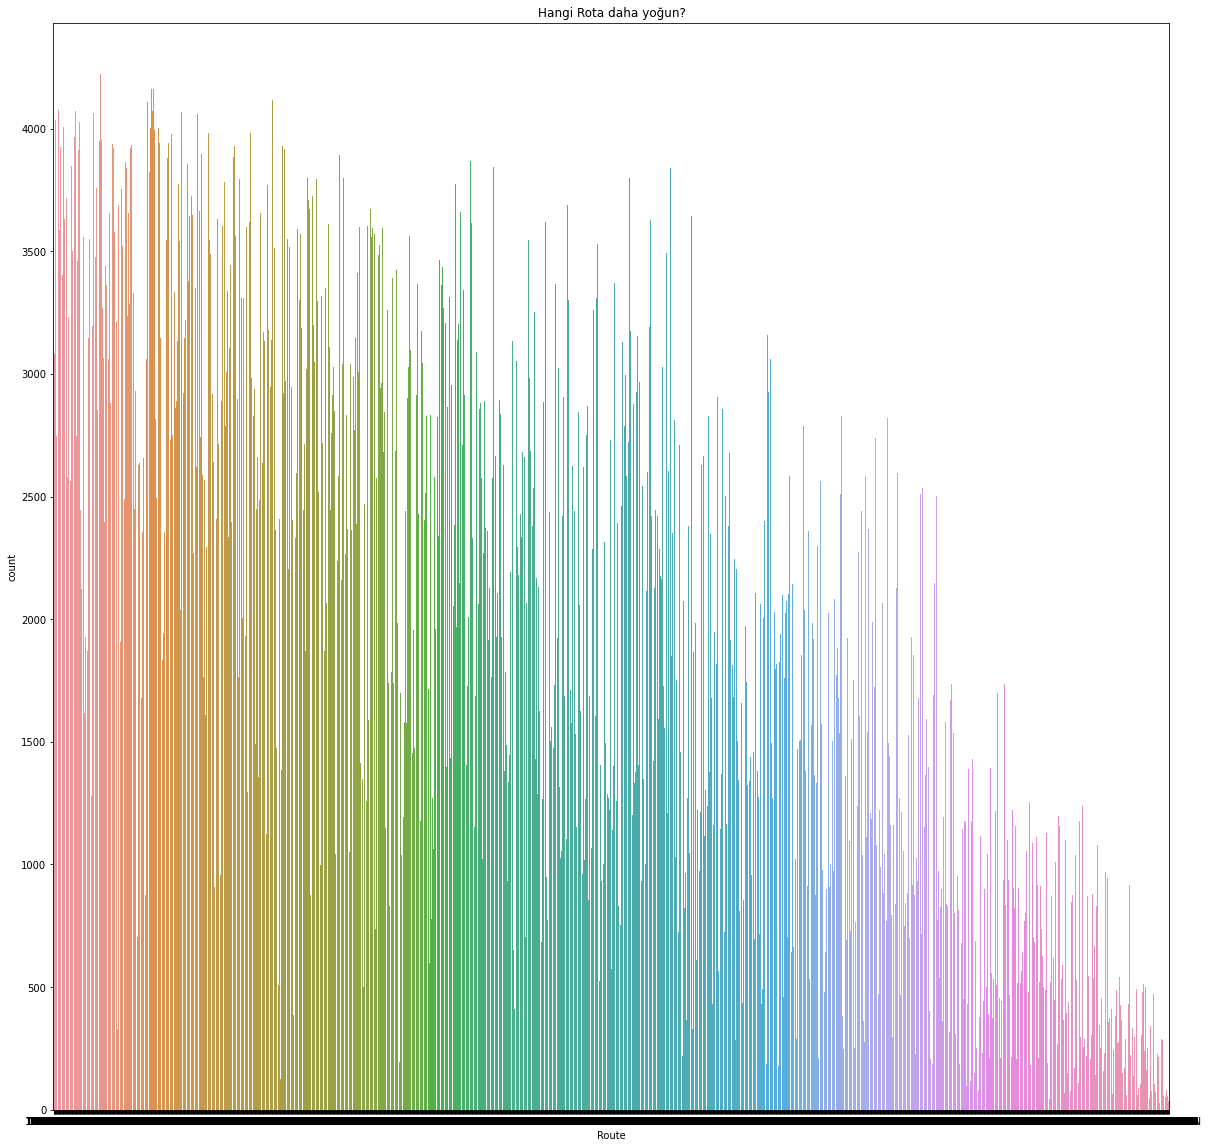

In [19]:
#Hangi Rota daha yoğun?
#When is the best time to go to SF from Berkeley if you want to find a seat
plt.figure(figsize = (20,20))
df["Route"] = df[["Origin Station", "Destination Station"]].apply(lambda x:"-".join(x),axis=1)
ex = sns.countplot(df['Route'])
ex.set_title('Hangi Rota daha yoğun?')

In [20]:
df.head()

,Hour,Origin Station,Destination Station,Trip Count,Year,Month,Weekday,WeekdayName,MonthName,Route
0,0,12TH,16TH,1,2022,1,5,Saturday,January,12TH-16TH
1,0,12TH,24TH,2,2022,1,5,Saturday,January,12TH-24TH
2,0,12TH,ASHB,1,2022,1,5,Saturday,January,12TH-ASHB
3,0,12TH,MONT,1,2022,1,5,Saturday,January,12TH-MONT
4,0,12TH,POWL,2,2022,1,5,Saturday,January,12TH-POWL


In [21]:
df['Route'].value_counts().sort_values(ascending = False)

EMBR-EMBR    4221
POWL-DALY    4163
POWL-FTVL    4162
POWL-24TH    4155
POWL-BALB    4144
             ... 
MLBR-BERY      44
WDUB-NCON      39
WDUB-ORIN      35
CAST-NCON      35
ORIN-WDUB      27
Name: Route, Length: 2500, dtype: int64

# En yoğun istasyon POWL
# En az kullanılan istasyon PCTR
# 03.00'da neredeyse hiç kullanılmıyor
# En yoğun 16.00 ve 17.00 arasında, iş çıkış saati
# En yoğun rota POWL-DALY arası

In [23]:
df.groupby(["Hour","Origin Station"]).sum()

Trip Count     Year  Month  Weekday
Hour Origin Station                                     
0    12TH                  3309  4519170   9378     7926
     16TH                 10318  9485202  20420    16591
     19TH                  7180  6405696  13909    11862
     24TH                  4725  5758656  12382    10376
     ANTC                   652  1195002   2659     1857
...                         ...      ...    ...      ...
23   UCTY                  1609  2766096   5863     3528
     WARM                  1490  2474928   5328     3298
     WCRK                  3849  4747656  10332     7006
     WDUB                  1210  1825866   4134     2794
     WOAK                  3835  4432224   9506     6466

[1188 rows x 4 columns]

In [24]:
x = df[["Month","Weekday","Hour"]] 
y = df[["Trip Count"]]

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 13)
lr = LinearRegression()
pred = lr.fit(x_train, y_train).predict(x_test)

In [27]:
mean_squared_error(y_test, pred)**0.5

8.678382597671936

In [28]:
r2_score(y_test, pred)

0.006123357346559666

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [35]:
model = Sequential()

model.add(Dense(12, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(12, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(x, y, epochs = 5, batch_size = 10, verbose = 1)

model.summary()

Epoch 1/5
471721/471721 [==============================] - 941s 2ms/step - loss: -1698460.1250 - accuracy: 0.3750
Epoch 2/5
471721/471721 [==============================] - 928s 2ms/step - loss: -11718572.0000 - accuracy: 0.3754
Epoch 3/5
471721/471721 [==============================] - 928s 2ms/step - loss: -31672192.0000 - accuracy: 0.3754
Epoch 4/5
471721/471721 [==============================] - 980s 2ms/step - loss: -61702024.0000 - accuracy: 0.3755
Epoch 5/5
471721/471721 [==============================] - 970s 2ms/step - loss: -101789384.0000 - accuracy: 0.3753
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 12)                48        
                                                                 
 batch_normalization_12 (Bat  (None, 12)               48        
 chNormalization)                                                
       

In [36]:
scores = model.evaluate(x,y)

147413/147413 [==============================] - 215s 1ms/step - loss: -121612904.0000 - accuracy: 0.3620
